# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import RepeatedKFold for cross-validation
from sklearn.model_selection import RepeatedKFold

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Pickle the best models for each dataset
import pickle

from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression

from pprint import pprint

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Imports for forward and backward selection
from sklearn.feature_selection import SequentialFeatureSelector

# Imports for PCA and PLS regression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')

In [3]:
convabuse.head()

,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [5]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [6]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

# Linear Modeling

In [7]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)

In [8]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [9]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [10]:
for columns in [convabuse_X_numeric.columns, online_abusive_attacks_X_numeric.columns]:
  print(columns)

Index(['example_no', 'annotator_id', 'ableism', 'homophobic', 'intellectual',
       'racist', 'sexist', 'sex_harassment', 'transphobic', 'generalised',
       'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')


In [11]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)

In [12]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)


In [13]:
convabuse_lasso_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
convabuse_ridge_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
convabuse_elasticnet_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_lasso_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_ridge_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_elasticnet_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

## Convabuse Stepwise Regression

In [14]:
convabuse_model = LinearRegression()

convabuse_forward = SequentialFeatureSelector(convabuse_model, n_features_to_select=11, direction="forward")
convabuse_backward = SequentialFeatureSelector(convabuse_model, n_features_to_select=11, direction="backward")

In [15]:
convabuse_forward.fit(convabuse_X_train, convabuse_y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=11)

In [16]:
convabuse_backward.fit(convabuse_X_train, convabuse_y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=11)

In [17]:
convabuse_forward_features = convabuse_X_train.columns[convabuse_forward.get_support()]
convabuse_backward_features = convabuse_X_train.columns[convabuse_backward.get_support()]

print("Forward Selection Features:", convabuse_forward_features)
print("Backward Selection Features:", convabuse_backward_features)

Forward Selection Features: Index(['example_no', 'annotator_id', 'homophobic', 'intellectual', 'racist',
       'sexist', 'sex_harassment', 'transphobic', 'generalised', 'explicit',
       'implicit'],
      dtype='object')
Backward Selection Features: Index(['annotator_id', 'homophobic', 'intellectual', 'racist', 'sexist',
       'sex_harassment', 'generalised', 'individual', 'system', 'explicit',
       'implicit'],
      dtype='object')


In [18]:
convabuse_forward_linear_model = LinearRegression()
convabuse_forward_linear_model.fit(convabuse_X_train[convabuse_forward_features], convabuse_y_train)
convabuse_forward_predictions = convabuse_forward_linear_model.predict(convabuse_X_test[convabuse_forward_features])
convabuse_forward_rmse = root_mean_squared_error(convabuse_y_test, convabuse_forward_predictions)
convabuse_forward_r2 = r2_score(convabuse_y_test, convabuse_forward_predictions)

print(f"Linear Regression RMSE (Convabuse): {convabuse_forward_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {convabuse_forward_r2:.2f}")

Linear Regression RMSE (Convabuse): 0.64
Linear Regression R2 Score (Convabuse): 0.80


In [19]:
convabuse_backward_linear_model = LinearRegression()
convabuse_backward_linear_model.fit(convabuse_X_train[convabuse_backward_features], convabuse_y_train)
convabuse_backward_predictions = convabuse_backward_linear_model.predict(convabuse_X_test[convabuse_backward_features])
convabuse_backward_rmse = root_mean_squared_error(convabuse_y_test, convabuse_backward_predictions)
convabuse_backward_r2 = r2_score(convabuse_y_test, convabuse_backward_predictions)

print(f"Linear Regression RMSE (Convabuse): {convabuse_backward_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {convabuse_backward_r2:.2f}")

Linear Regression RMSE (Convabuse): 0.64
Linear Regression R2 Score (Convabuse): 0.80


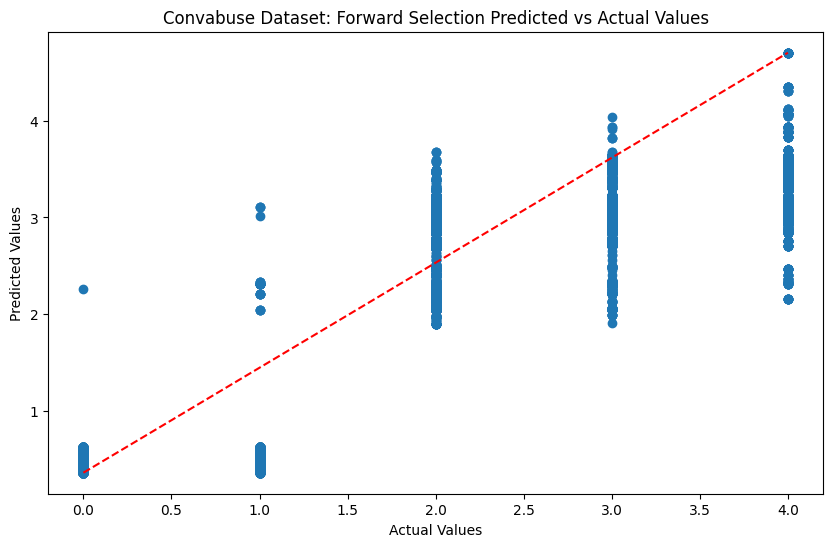

In [20]:
# Plot the predicted vs actual values for forward selection on the Convabuse dataset
plt.figure(figsize=(10, 6))
plt.scatter(convabuse_y_test, convabuse_forward_predictions)
# Plot the linear regression line
plt.plot([min(convabuse_y_test), max(convabuse_y_test)], [min(convabuse_forward_predictions), max(convabuse_forward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Convabuse Dataset: Forward Selection Predicted vs Actual Values")
plt.show()

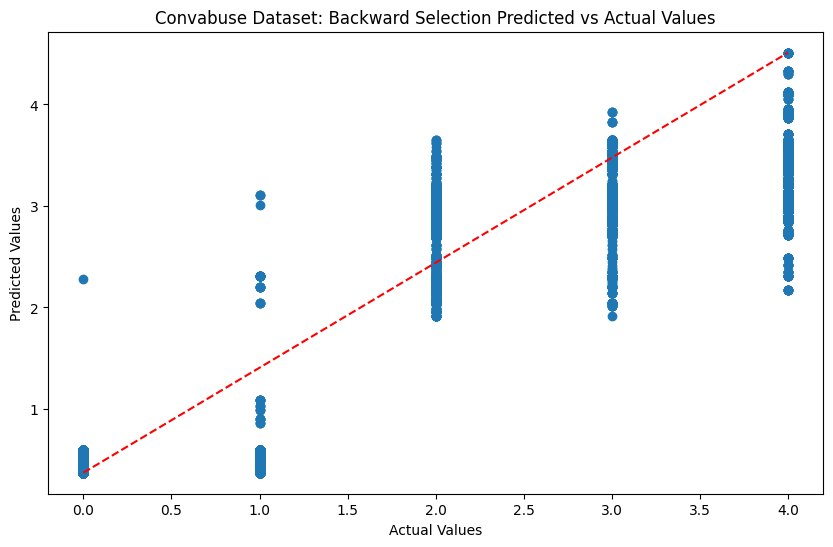

In [21]:
# Plot the predicted vs actual values for backward selection on the Convabuse dataset
plt.figure(figsize=(10, 6))
plt.scatter(convabuse_y_test, convabuse_backward_predictions)
# Plot the linear regression line
plt.plot([min(convabuse_y_test), max(convabuse_y_test)], [min(convabuse_backward_predictions), max(convabuse_backward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Convabuse Dataset: Backward Selection Predicted vs Actual Values")
plt.show()

In [22]:
# Compare the RMSE values for forward and backward selection on the Convabuse dataset
print(f"Forward Selection RMSE: {convabuse_forward_rmse:.2f}")
print(f"Backward Selection RMSE: {convabuse_backward_rmse:.2f}")

# Determine which model performed better (RMSE value)
if convabuse_forward_rmse < convabuse_backward_rmse:
    print(f"Forward Selection performed better on the Convabuse dataset with an RMSE of {convabuse_forward_rmse:.2f}.")
else:
    print(f"Backward Selection performed better on the Convabuse dataset with an RMSE of {convabuse_backward_rmse:.2f}.")
print()

# Compare the R2 values for forward and backward selection on the Convabuse dataset
print(f"Forward Selection R2 Score: {convabuse_forward_r2:.2f}")
print(f"Backward Selection R2 Score: {convabuse_backward_r2:.2f}")

# Determine which model performed better (R2 value)
if convabuse_forward_r2 > convabuse_backward_r2:
    print(f"Forward Selection performed better on the Convabuse dataset with an R2 score of {convabuse_forward_r2:.2f}.")
else:
    print(f"Backward Selection performed better on the Convabuse dataset with an R2 score of {convabuse_backward_r2:.2f}.")

Forward Selection RMSE: 0.64
Backward Selection RMSE: 0.64
Backward Selection performed better on the Convabuse dataset with an RMSE of 0.64.

Forward Selection R2 Score: 0.80
Backward Selection R2 Score: 0.80
Backward Selection performed better on the Convabuse dataset with an R2 score of 0.80.


## Convabuse Principal Components Regression

### Convabuse PCR

In [23]:
convabuse_pcr = make_pipeline(PCA(n_components=13), LinearRegression())
convabuse_pcr.fit(convabuse_X_train, convabuse_y_train)
convabuse_pca = convabuse_pcr.named_steps['pca']

In [24]:
convabuse_pcr_predictions = convabuse_pcr.predict(convabuse_X_test)

In [25]:
convabuse_pcr_explained_variance = np.sum(convabuse_pca.explained_variance_ratio_)
convabuse_pcr_explained_variance

np.float64(0.9998277943474565)

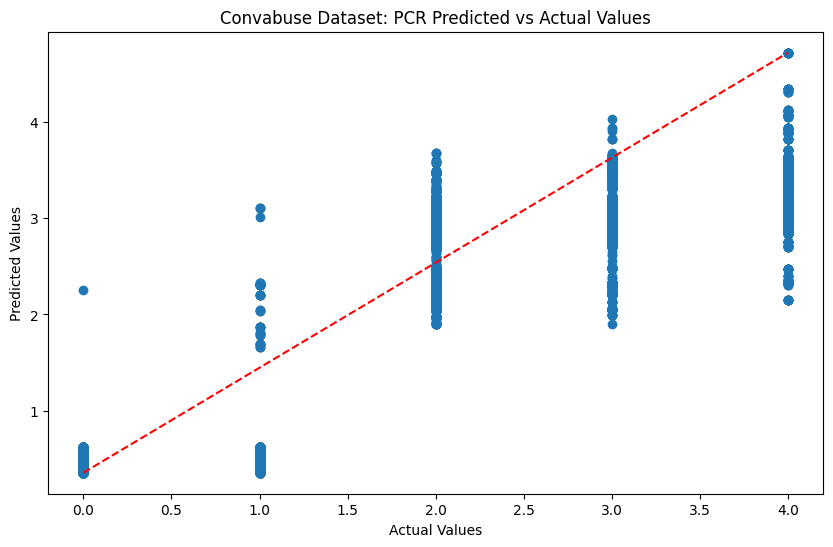

In [26]:
# Plot the predicted vs actual values for PCR on the Convabuse dataset
plt.figure(figsize=(10, 6))
plt.scatter(convabuse_y_test, convabuse_pcr_predictions)
# Plot the linear regression line
plt.plot([min(convabuse_y_test), max(convabuse_y_test)], [min(convabuse_pcr_predictions), max(convabuse_pcr_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Convabuse Dataset: PCR Predicted vs Actual Values")
plt.show()

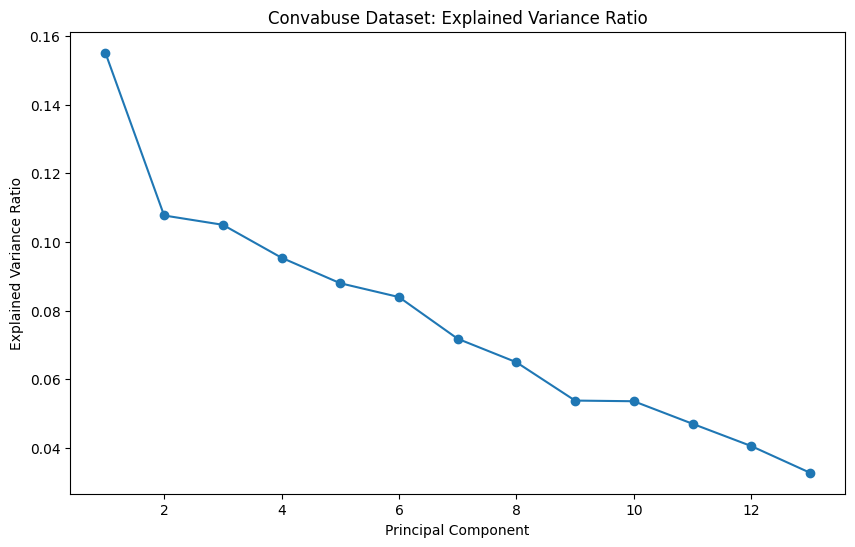

In [27]:
# Plot the explained variance ratio for PCR
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(convabuse_pca.explained_variance_ratio_) + 1), convabuse_pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Convabuse Dataset: Explained Variance Ratio")
plt.show()

### Convabuse PSLR

In [28]:
convabuse_pls = PLSRegression(n_components=13)
convabuse_pls.fit(convabuse_X_train, convabuse_y_train)

PLSRegression(n_components=13)

In [29]:
convabuse_pls_predictions = convabuse_pls.predict(convabuse_X_test)

In [30]:
convabuse_pls_explained_variance = convabuse_pls.x_scores_.var(axis=0) / np.sum(convabuse_pls.x_scores_.var(axis=0))
convabuse_pls_explained_variance_ratio = np.sum(convabuse_pls_explained_variance)
convabuse_pls_explained_variance_ratio

np.float64(0.9999999999999998)

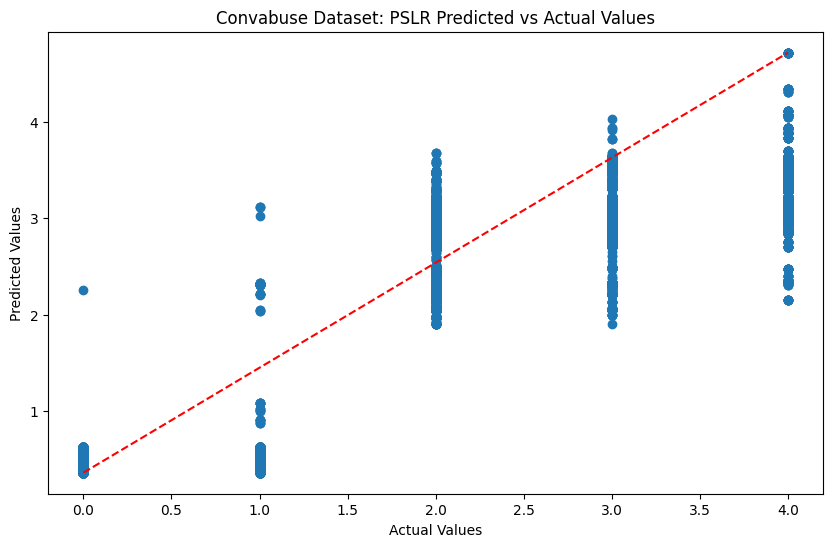

In [31]:
# Plot the predicted vs actual values for PSLR on the Convabuse dataset
plt.figure(figsize=(10, 6))
plt.scatter(convabuse_y_test, convabuse_pls_predictions)
# Plot the linear regression line
plt.plot([min(convabuse_y_test), max(convabuse_y_test)], [min(convabuse_pls_predictions), max(convabuse_pls_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Convabuse Dataset: PSLR Predicted vs Actual Values")
plt.show()

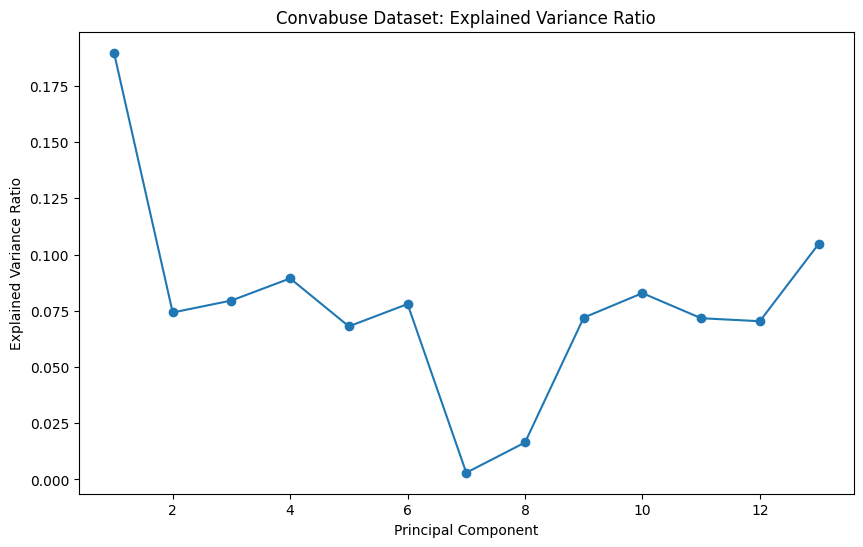

In [32]:
# Plot the explained variance ratio for PSLR
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(convabuse_pls_explained_variance) + 1), convabuse_pls.x_scores_.var(axis=0) / np.sum(convabuse_pls.x_scores_.var(axis=0)), marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Convabuse Dataset: Explained Variance Ratio")
plt.show()

### Convabuse Principal Components Regression Conclusion

In [33]:
# Calculate RMSE for the Convabuse PCR predictions
convabuse_pcr_rmse = root_mean_squared_error(convabuse_y_test, convabuse_pcr_predictions)
convabuse_pcr_r2 = r2_score(convabuse_y_test, convabuse_pcr_predictions)

# Calculate RMSE for the Convabuse PLS predictions
convabuse_pls_rmse = root_mean_squared_error(convabuse_y_test, convabuse_pls_predictions)
convabuse_pls_r2 = r2_score(convabuse_y_test, convabuse_pls_predictions)

# Print RMSE values for PCR and PLS
print(f"Convabuse PCR RMSE: {convabuse_pcr_rmse:.2f}")
print(f"Convabuse PCR R2 Score: {convabuse_pcr_r2:.2f}")
print(f"Convabuse PLS RMSE: {convabuse_pls_rmse:.2f}")
print(f"Convabuse PLS R2 Score: {convabuse_pls_r2:.2f}")
print()

# Compare the RMSE values for PCR and PLS
if convabuse_pcr_rmse < convabuse_pls_rmse:
    print("The PCR model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(convabuse_pcr_rmse))
else:
    print("The PLS model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(convabuse_pls_rmse))

# Compare the R2 values for PCR and PLS
if convabuse_pcr_r2 > convabuse_pls_r2:
    print("The PCR model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(convabuse_pcr_r2))
else:
    print("The PLS model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(convabuse_pls_r2))

Convabuse PCR RMSE: 0.64
Convabuse PCR R2 Score: 0.80
Convabuse PLS RMSE: 0.64
Convabuse PLS R2 Score: 0.80

The PLS model performed better on the Convabuse dataset with an RMSE of 0.64.
The PLS model performed better on the Convabuse dataset with an R2 score of 0.80.


## Online Abusive Attacks Stepwise Regression

In [34]:
online_abusive_attacks_model = LinearRegression()

online_abusive_attacks_forward = SequentialFeatureSelector(online_abusive_attacks_model, n_features_to_select=3, direction="forward")
online_abusive_attacks_backward = SequentialFeatureSelector(online_abusive_attacks_model, n_features_to_select=3, direction="backward")

In [35]:
online_abusive_attacks_forward.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3)

In [36]:
online_abusive_attacks_backward.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=3)

In [37]:
online_abusive_attacks_forward_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_forward.get_support()]
online_abusive_attacks_backward_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_backward.get_support()]

print("Forward Selection Features:", online_abusive_attacks_forward_features)
print("Backward Selection Features:", online_abusive_attacks_backward_features)

Forward Selection Features: Index(['high Profanity', 'high Threat', 'high other attr'], dtype='object')
Backward Selection Features: Index(['high Profanity', 'high Threat', 'high other attr'], dtype='object')


In [38]:
online_abusive_attacks_forward_linear_model = LinearRegression()
online_abusive_attacks_forward_linear_model.fit(online_abusive_attacks_X_train[online_abusive_attacks_forward_features], online_abusive_attacks_y_train)
online_abusive_attacks_forward_predictions = online_abusive_attacks_forward_linear_model.predict(online_abusive_attacks_X_test[online_abusive_attacks_forward_features])
online_abusive_attacks_forward_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)
online_abusive_attacks_forward_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)

print(f"Forward Selection RMSE (Online Abusive Attacks): {online_abusive_attacks_forward_rmse:.2f}")
print(f"Forward Selection R2 Score (Online Abusive Attacks): {online_abusive_attacks_forward_r2:.2f}")

Forward Selection RMSE (Online Abusive Attacks): 4.87
Forward Selection R2 Score (Online Abusive Attacks): 0.90


In [39]:
online_abusive_attacks_backward_linear_model = LinearRegression()
online_abusive_attacks_backward_linear_model.fit(online_abusive_attacks_X_train[online_abusive_attacks_backward_features], online_abusive_attacks_y_train)
online_abusive_attacks_backward_predictions = online_abusive_attacks_backward_linear_model.predict(online_abusive_attacks_X_test[online_abusive_attacks_backward_features])
online_abusive_attacks_backward_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)
online_abusive_attacks_backward_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)

print(f"Backward Selection RMSE (Online Abusive Attacks): {online_abusive_attacks_backward_rmse:.2f}")
print(f"Backward Selection R2 Score (Online Abusive Attacks): {online_abusive_attacks_backward_r2:.2f}")

Backward Selection RMSE (Online Abusive Attacks): 4.87
Backward Selection R2 Score (Online Abusive Attacks): 0.90


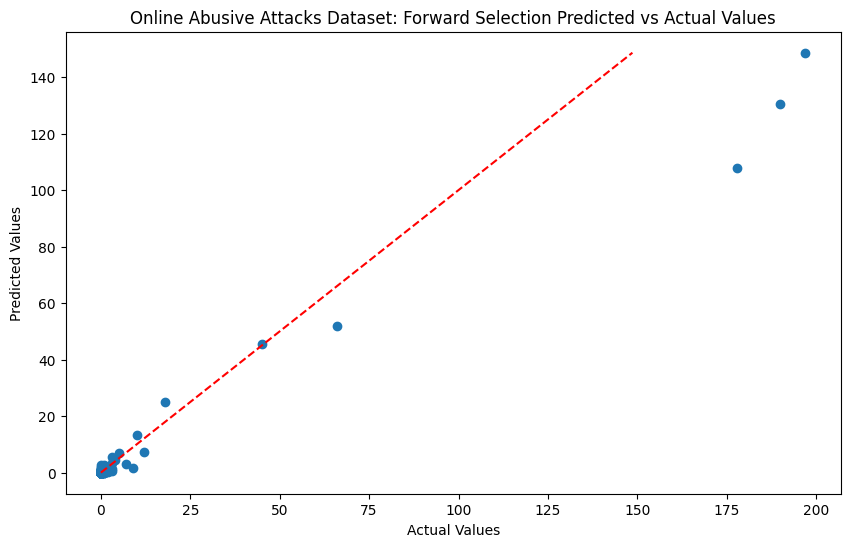

In [40]:
# Plot the predicted vs actual values for forward selection on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_forward_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_forward_predictions)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_forward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: Forward Selection Predicted vs Actual Values")
plt.show()

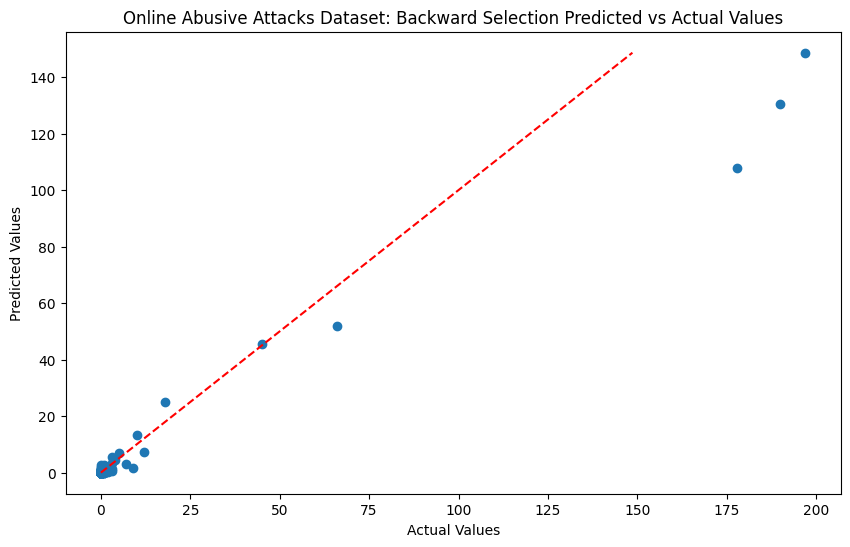

In [41]:
# Plot the predicted vs actual values for backward selection on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_backward_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_backward_predictions)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_backward_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: Backward Selection Predicted vs Actual Values")
plt.show()

In [42]:
# Compare the RMSE values for forward and backward selection on the Online Abusive Attacks dataset
print(f"Forward Selection RMSE: {online_abusive_attacks_forward_rmse:.2f}")
print(f"Backward Selection RMSE: {online_abusive_attacks_backward_rmse:.2f}")

# Determine which model performed better (RMSE value)
if online_abusive_attacks_forward_rmse < online_abusive_attacks_backward_rmse:
    print(f"Forward Selection performed better on the Online Abusive Attacks dataset with an RMSE of {online_abusive_attacks_forward_rmse:.2f}.")
else:
    print(f"Backward Selection performed better on the Online Abusive Attacks dataset with an RMSE of {online_abusive_attacks_backward_rmse:.2f}.")
print()

# Compare the R2 values for forward and backward selection on the Online Abusive Attacks dataset
print(f"Forward Selection R2 Score: {online_abusive_attacks_forward_r2:.2f}")
print(f"Backward Selection R2 Score: {online_abusive_attacks_backward_r2:.2f}")

# Determine which model performed better (R2 value)
if online_abusive_attacks_forward_r2 > online_abusive_attacks_backward_r2:
    print(f"Forward Selection performed better on the Online Abusive Attacks dataset with an R2 score of {online_abusive_attacks_forward_r2:.2f}.")
else:
    print(f"Backward Selection performed better on the Online Abusive Attacks dataset with an R2 score of {online_abusive_attacks_backward_r2:.2f}.")

Forward Selection RMSE: 4.87
Backward Selection RMSE: 4.87
Backward Selection performed better on the Online Abusive Attacks dataset with an RMSE of 4.87.

Forward Selection R2 Score: 0.90
Backward Selection R2 Score: 0.90
Backward Selection performed better on the Online Abusive Attacks dataset with an R2 score of 0.90.


## Online Abusive Attacks PCR

In [43]:
online_abusive_attacks_pcr = make_pipeline(PCA(n_components=5), LinearRegression())
online_abusive_attacks_pcr.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
online_abusive_attacks_pca = online_abusive_attacks_pcr.named_steps['pca']

In [44]:
online_abusive_attacks_pcr_predictions = online_abusive_attacks_pcr.predict(online_abusive_attacks_X_test)

In [45]:
online_abusive_attacks_pcr_explained_variance = np.sum(online_abusive_attacks_pca.explained_variance_ratio_)
online_abusive_attacks_pcr_explained_variance

np.float64(1.0)

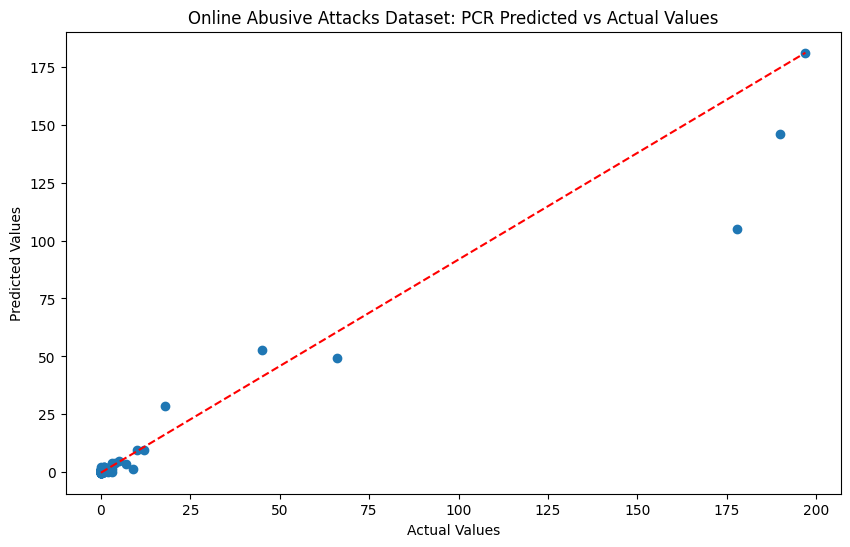

In [46]:
# Plot the predicted vs actual values for PCR on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_pcr_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], [min(online_abusive_attacks_pcr_predictions), max(online_abusive_attacks_pcr_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: PCR Predicted vs Actual Values")
plt.show()

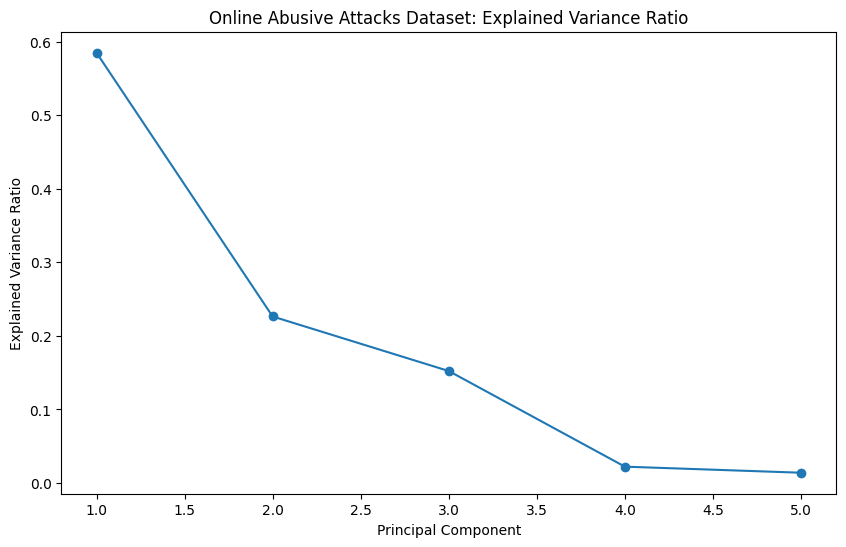

In [47]:
# Plot the explained variance ratio for PCR
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(online_abusive_attacks_pca.explained_variance_ratio_) + 1), online_abusive_attacks_pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Online Abusive Attacks Dataset: Explained Variance Ratio")
plt.show()

## Online Abusive Attacks PSLR

In [48]:
online_abusive_attacks_pls = PLSRegression(n_components=5)
online_abusive_attacks_pls.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

PLSRegression(n_components=5)

In [49]:
online_abusive_attacks_pls_predictions = online_abusive_attacks_pls.predict(online_abusive_attacks_X_test)

In [50]:
online_abusive_attacks_pls_explained_variance = online_abusive_attacks_pls.x_scores_.var(axis=0) / np.sum(online_abusive_attacks_pls.x_scores_.var(axis=0))
online_abusive_attacks_pls_explained_variance_ratio = np.sum(online_abusive_attacks_pls_explained_variance)
online_abusive_attacks_pls_explained_variance_ratio

np.float64(1.0)

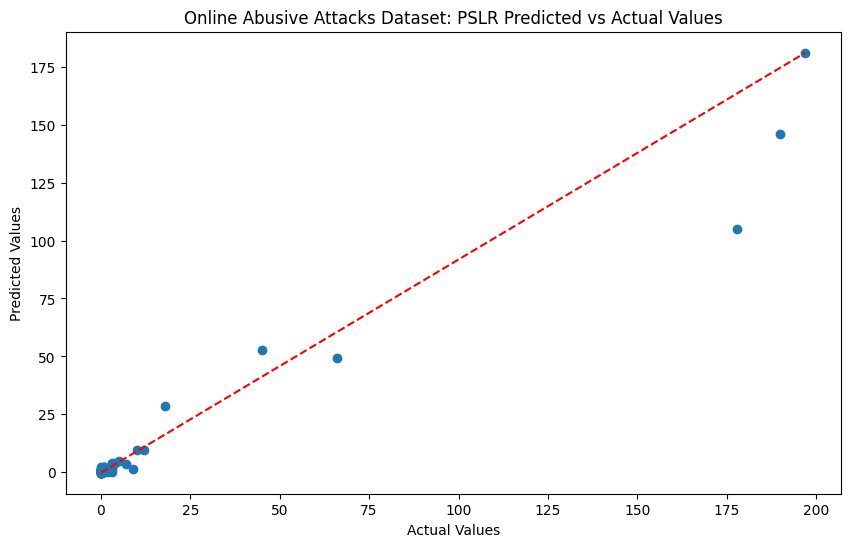

In [51]:
# Plot the predicted vs actual values for PSLR on the Online Abusive Attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_pls_predictions)
# Plot the linear regression line
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], [min(online_abusive_attacks_pls_predictions), max(online_abusive_attacks_pls_predictions)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Online Abusive Attacks Dataset: PSLR Predicted vs Actual Values")
plt.show()

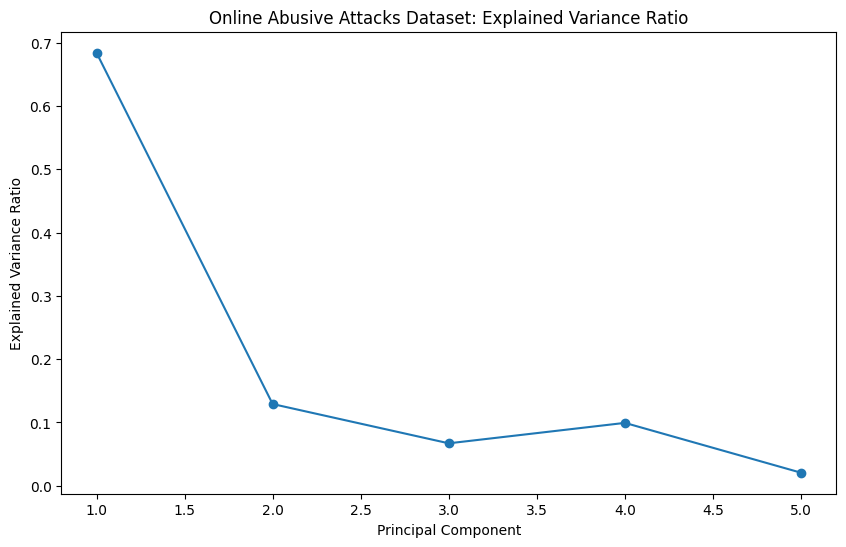

In [52]:
# Plot the explained variance ratio for PSLR
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(online_abusive_attacks_pls_explained_variance) + 1), online_abusive_attacks_pls.x_scores_.var(axis=0) / np.sum(online_abusive_attacks_pls.x_scores_.var(axis=0)), marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Online Abusive Attacks Dataset: Explained Variance Ratio")
plt.show()

## Online Abusive Attacks Principal Components Regression Conclusion

In [53]:
# Calculate RMSE for the Convabuse PCR predictions
online_abusive_attacks_pcr_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_pcr_predictions)
online_abusive_attacks_pcr_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_pcr_predictions)

# Calculate RMSE for the Convabuse PLS predictions
online_abusive_attacks_pls_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_pls_predictions)
online_abusive_attacks_pls_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_pls_predictions)

# Print RMSE values for PCR and PLS
print(f"Convabuse PCR RMSE: {online_abusive_attacks_pcr_rmse:.2f}")
print(f"Convabuse PCR R2 Score: {online_abusive_attacks_pcr_r2:.2f}")
print(f"Convabuse PLS RMSE: {online_abusive_attacks_pls_rmse:.2f}")
print(f"Convabuse PLS R2 Score: {online_abusive_attacks_pls_r2:.2f}")
print()

# Compare the RMSE values for PCR and PLS
if online_abusive_attacks_pcr_rmse < online_abusive_attacks_pls_rmse:
    print("The PCR model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(online_abusive_attacks_pcr_rmse))
else:
    print("The PLS model performed better on the Convabuse dataset with an RMSE of {:.2f}.".format(online_abusive_attacks_pls_rmse))

# Compare the R2 values for PCR and PLS
if online_abusive_attacks_pcr_r2 > online_abusive_attacks_pls_r2:
    print("The PCR model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(online_abusive_attacks_pcr_r2))
else:
    print("The PLS model performed better on the Convabuse dataset with an R2 score of {:.2f}.".format(online_abusive_attacks_pls_r2))

Convabuse PCR RMSE: 4.13
Convabuse PCR R2 Score: 0.93
Convabuse PLS RMSE: 4.13
Convabuse PLS R2 Score: 0.93

The PCR model performed better on the Convabuse dataset with an RMSE of 4.13.
The PCR model performed better on the Convabuse dataset with an R2 score of 0.93.


## Stepwise Regression Model Summary

In [54]:
# Create a feature regression model dictionary where each dataset maps to its RMSE and R2
stepwise_regression_model_summary_data = [
    {
        "Model": "Forward Selection",
        "Dataset": "Convabuse",
        "RMSE": convabuse_forward_rmse,
        "R2": convabuse_forward_r2
    },
    {
        "Model": "Backward Selection",
        "Dataset": "Convabuse",
        "RMSE": convabuse_backward_rmse,
        "R2": convabuse_backward_r2
    },
    {
        "Model": "Principal Components Regression",
        "Dataset": "Convabuse",
        "RMSE": convabuse_pcr_rmse,
        "R2": convabuse_pcr_r2
    },
    {
        "Model": "Principal Least Squares Regression",
        "Dataset": "Convabuse",
        "RMSE": convabuse_pls_rmse,
        "R2": convabuse_pls_r2
    },
    {
        "Model": "Forward Selection",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_forward_rmse,
        "R2": online_abusive_attacks_forward_r2
    },
    {
        "Model": "Backward Selection",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_backward_rmse,
        "R2": online_abusive_attacks_backward_r2
    },
    {
        "Model": "Principal Components Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_pcr_rmse,
        "R2": online_abusive_attacks_pcr_r2
    },
    {
        "Model": "Principal Least Squares Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_pls_rmse,
        "R2": online_abusive_attacks_pls_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
stepwise_regression_model_summary = pd.DataFrame(stepwise_regression_model_summary_data)
stepwise_regression_model_summary

,Model,Dataset,RMSE,R2
0,Forward Selection,Convabuse,0.636750,0.797127
1,Backward Selection,Convabuse,0.636239,0.797453
2,Principal Components Regression,Convabuse,0.637241,0.796814
3,Principal Least Squares Regression,Convabuse,0.636337,0.797390
4,Forward Selection,Online Abusive Attacks,4.869362,0.900313
5,Backward Selection,Online Abusive Attacks,4.869362,0.900313
6,Principal Components Regression,Online Abusive Attacks,4.129479,0.928306
7,Principal Least Squares Regression,Online Abusive Attacks,4.129479,0.928306


In [55]:
# Export the feature_regression_model_summary and the linear_regression_model_summary
stepwise_regression_model_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model3_stepwise-regression-summary.csv", index=False)